In [214]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import LabelEncoder

In [215]:
#read the file
df = pd.read_csv("LoanStats.csv")

In [216]:
#checking the numbers of columns and rows in the dataframe
df.shape

(39786, 7)

In [217]:
#checking first 5 rows to see whether the right variables are in the dataset
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


## Data Understanding

In [218]:
#checking datatypes 
df.dtypes

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object

In [219]:
df.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


In [220]:
# checking the distribution of loan_terms (approved short term loans is higher than long term loans)
df["term"].value_counts()


36    29096
60    10690
Name: term, dtype: int64

Text(0.5, 0, 'Term')

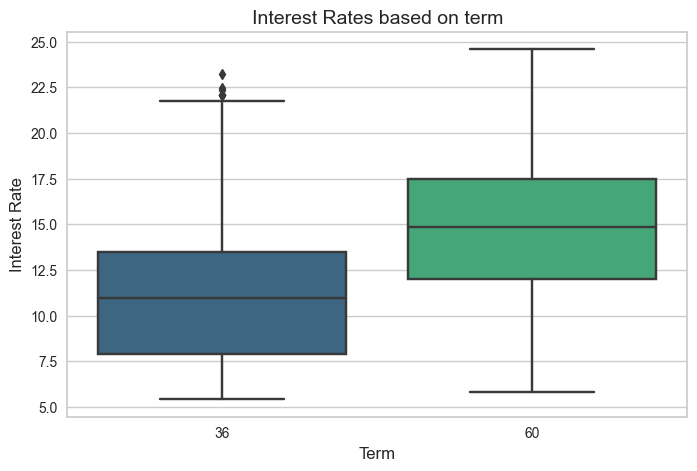

In [221]:
#box plot of int_rate and term (interest rate is higher with longer loan terms)
plt.figure(figsize=(8,5))
ax= sns.boxplot(data=df, x="term", y="int_rate", palette="viridis")
ax.set_title('Interest Rates based on term',fontsize=14)
ax.set_ylabel('Interest Rate',fontsize=12)
ax.set_xlabel('Term',fontsize=12)

In [222]:
#distribution of purpose of getting loan in the dataset 
df["purpose"].value_counts()


debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

Text(0, 0.5, 'Frenquency')

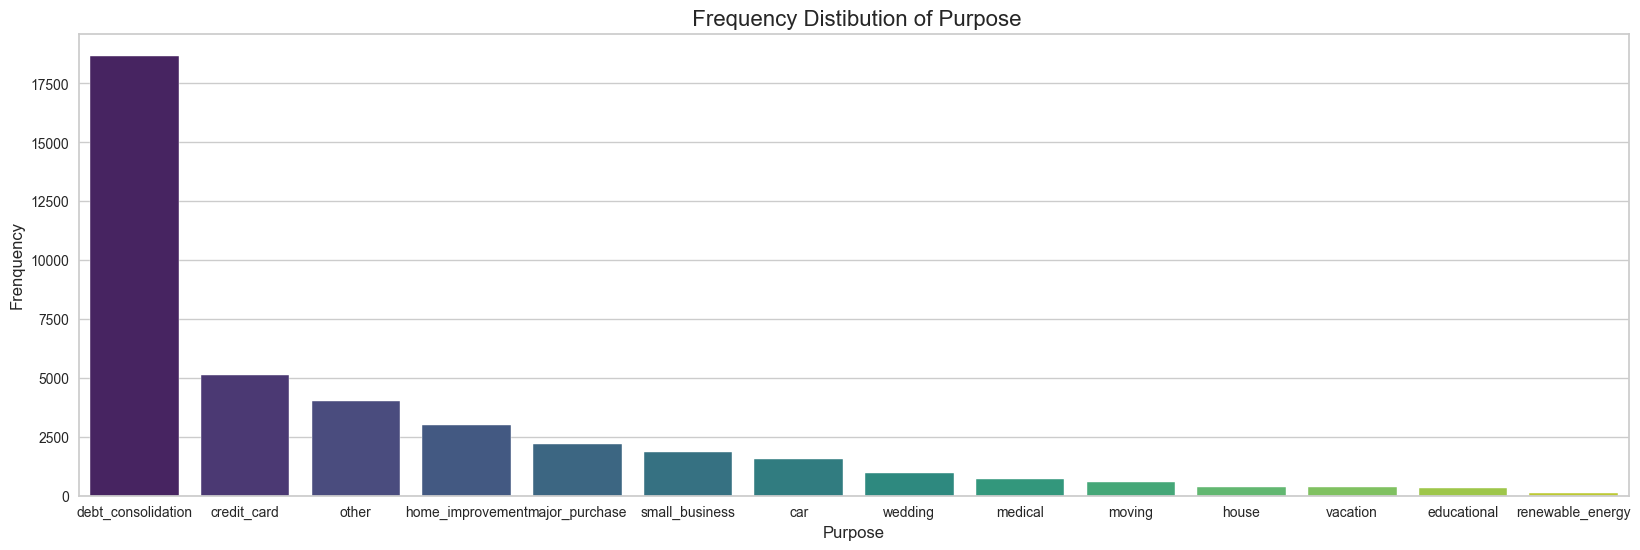

In [223]:
# Purpose frenquency plot
plt.figure(figsize = (20,6))
ax=sns.countplot(x = "purpose",data = df, palette = 'viridis',order = df['purpose'].value_counts().index)
ax.set_title(" Frequency Distibution of Purpose", fontsize=16)
ax.set_xlabel("Purpose", fontsize=12)
ax.set_ylabel("Frenquency", fontsize=12)


Text(0, 0.5, 'Frequency')

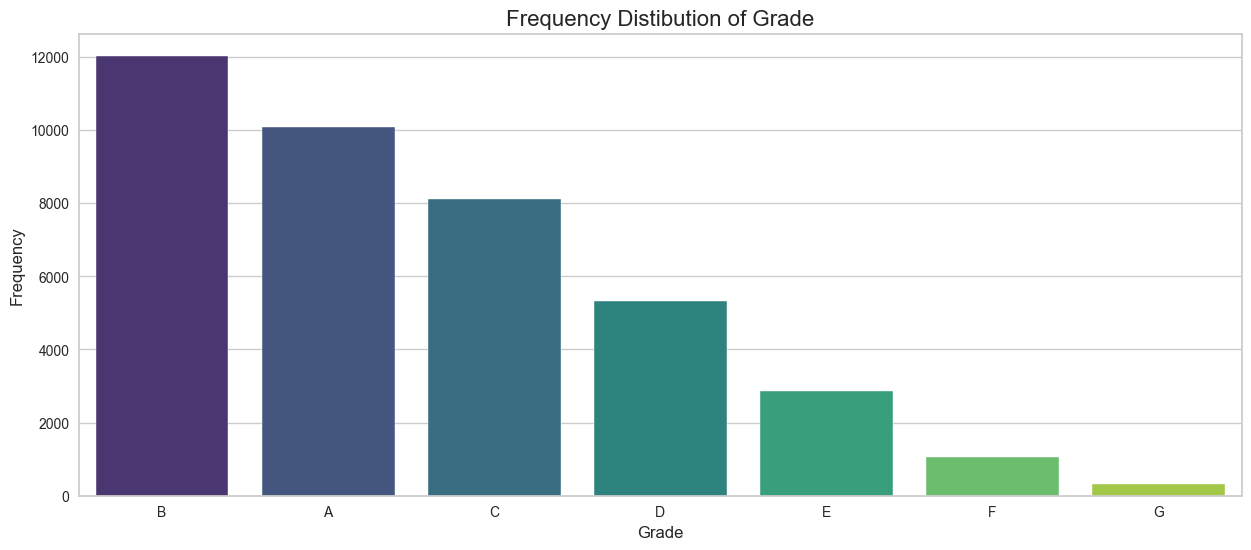

In [224]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = "grade",data = df,palette ='viridis', order = df['grade'].value_counts().index)
ax.set_title("Frequency Distibution of Grade", fontsize=16)
ax.set_xlabel("Grade", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)


C:\Users\duygu\AppData\Local\Temp\ipykernel_33192\2187622925.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Frequency Distribuition of Interest Rate')

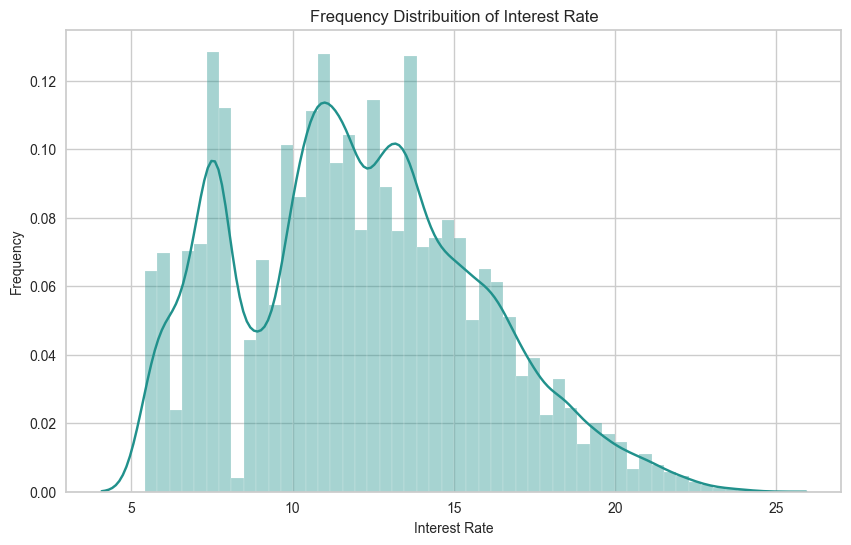

In [321]:
# Frequency distribution of Interest Rate
plt.figure(figsize = (10,6))
f2 = sns.distplot(df["int_rate"], color= "#21918c")
f2.set_xlabel("Interest Rate", fontsize=10)
f2.set_ylabel("Frequency", fontsize=10)
f2.set_title("Frequency Distribuition of Interest Rate", fontsize=12)


Text(0.5, 0, 'Purpose')

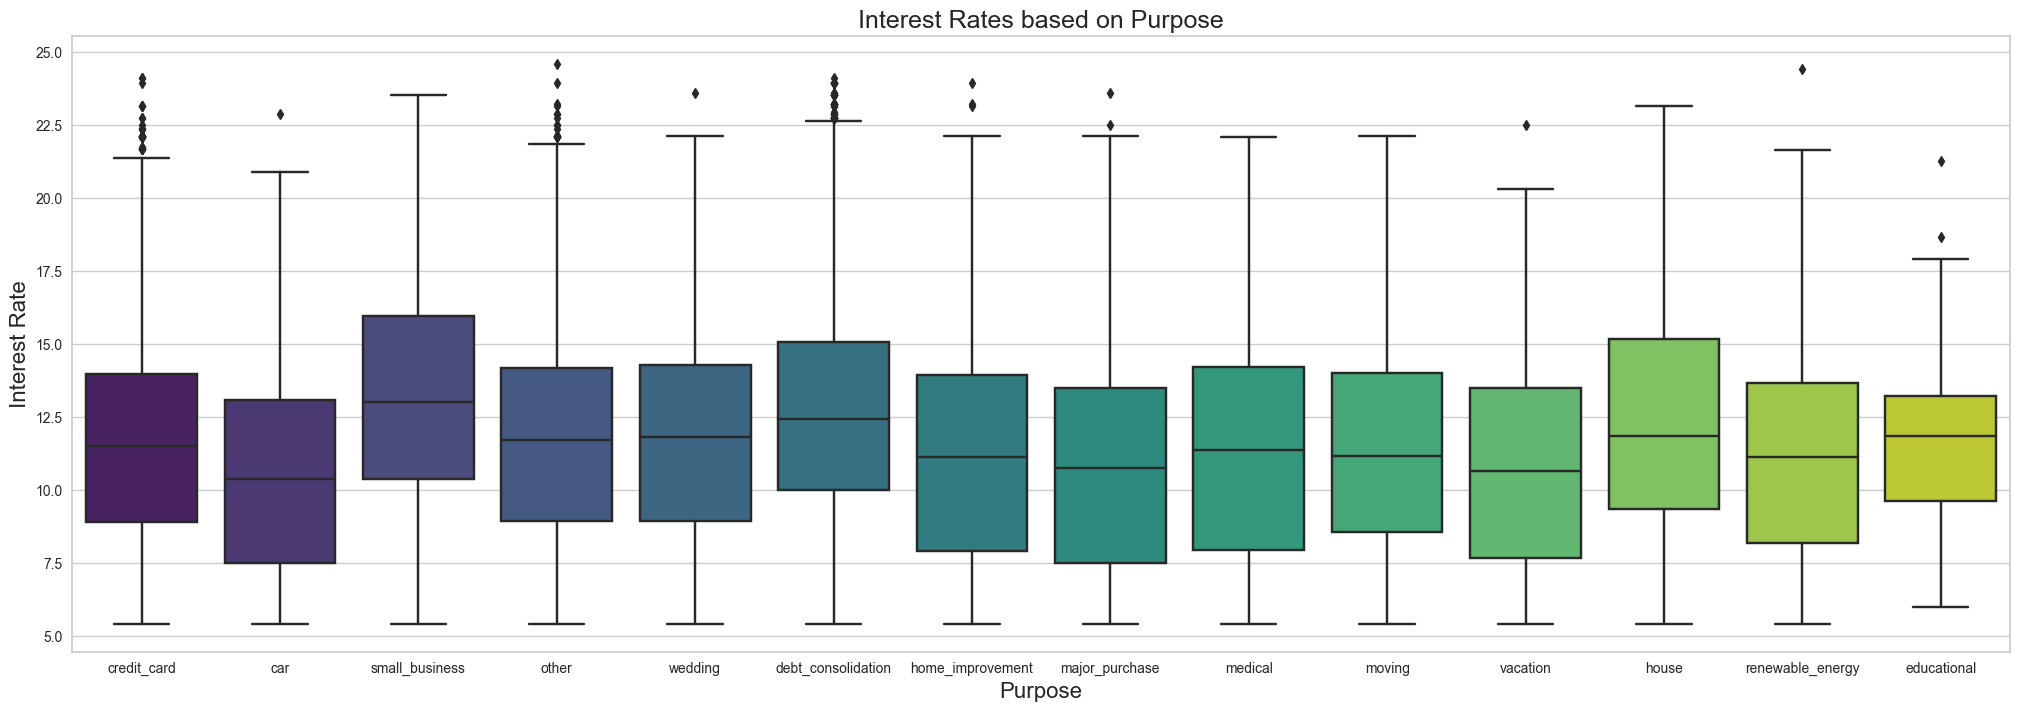

In [226]:
#box plot of int_rate and term (interest rate is higher with longer loan terms)
plt.figure(figsize=(25,8))
ax=sns.boxplot(data=df, x="purpose", y="int_rate", palette="viridis")
ax.set_title('Interest Rates based on Purpose',fontsize=18)
ax.set_ylabel('Interest Rate',fontsize=16)
ax.set_xlabel('Purpose',fontsize=16)

Text(0.5, 0, 'Grade')

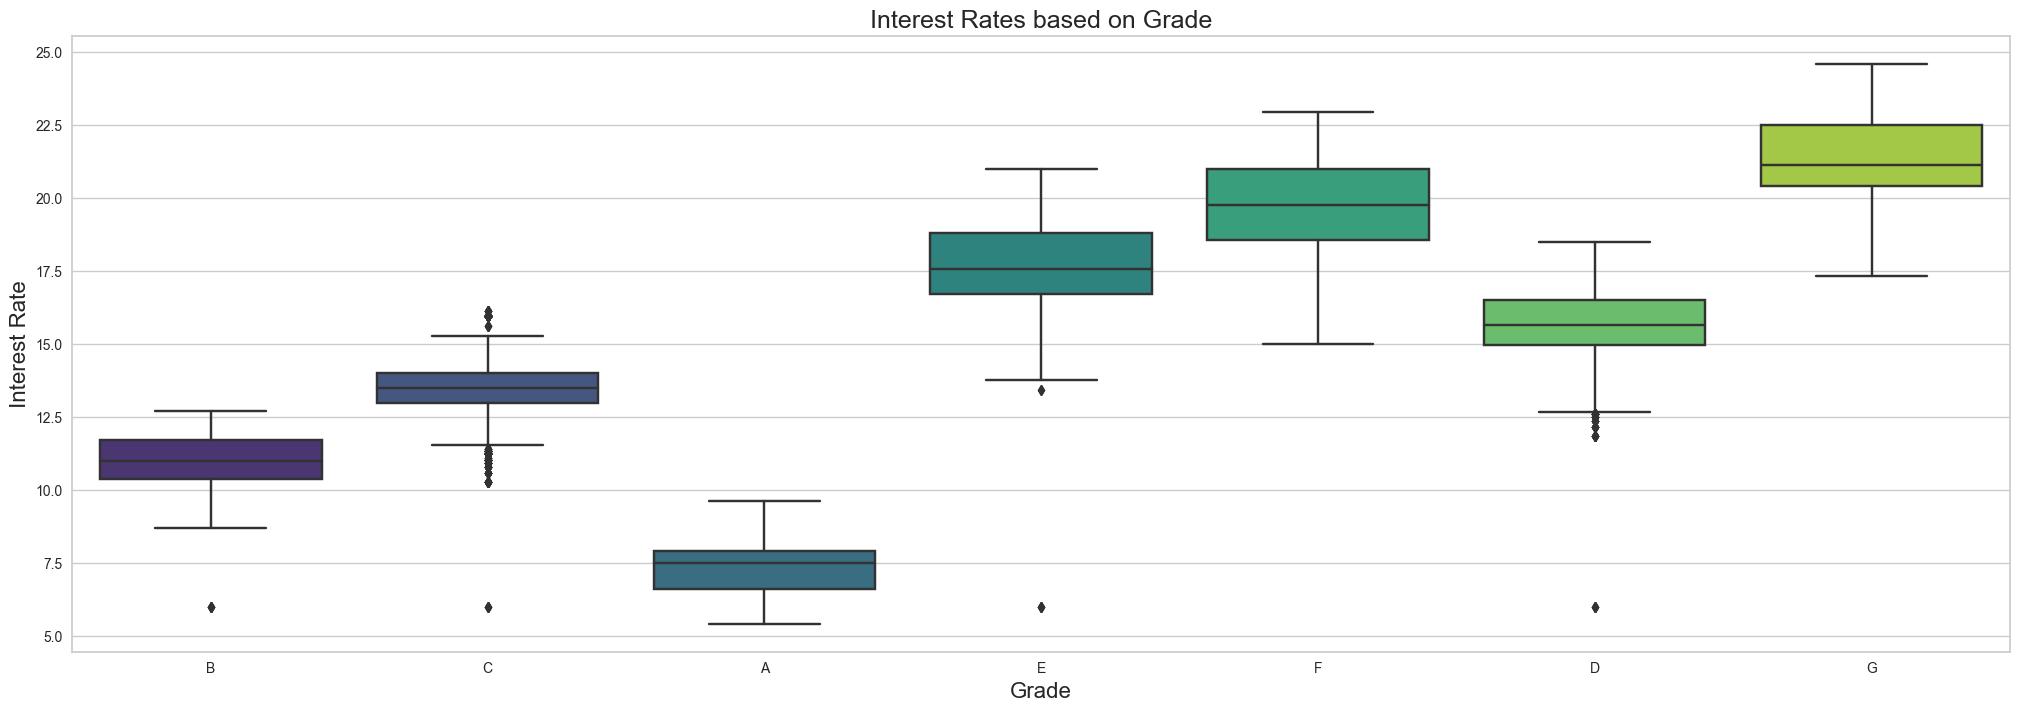

In [227]:
plt.figure(figsize=(25,8))
ax= sns.boxplot(data=df, x="grade", y="int_rate", palette="viridis")
ax.set_title('Interest Rates based on Grade',fontsize=18)
ax.set_ylabel('Interest Rate',fontsize=16)
ax.set_xlabel('Grade',fontsize=16)

Text(0.5, 0, 'Purpose')

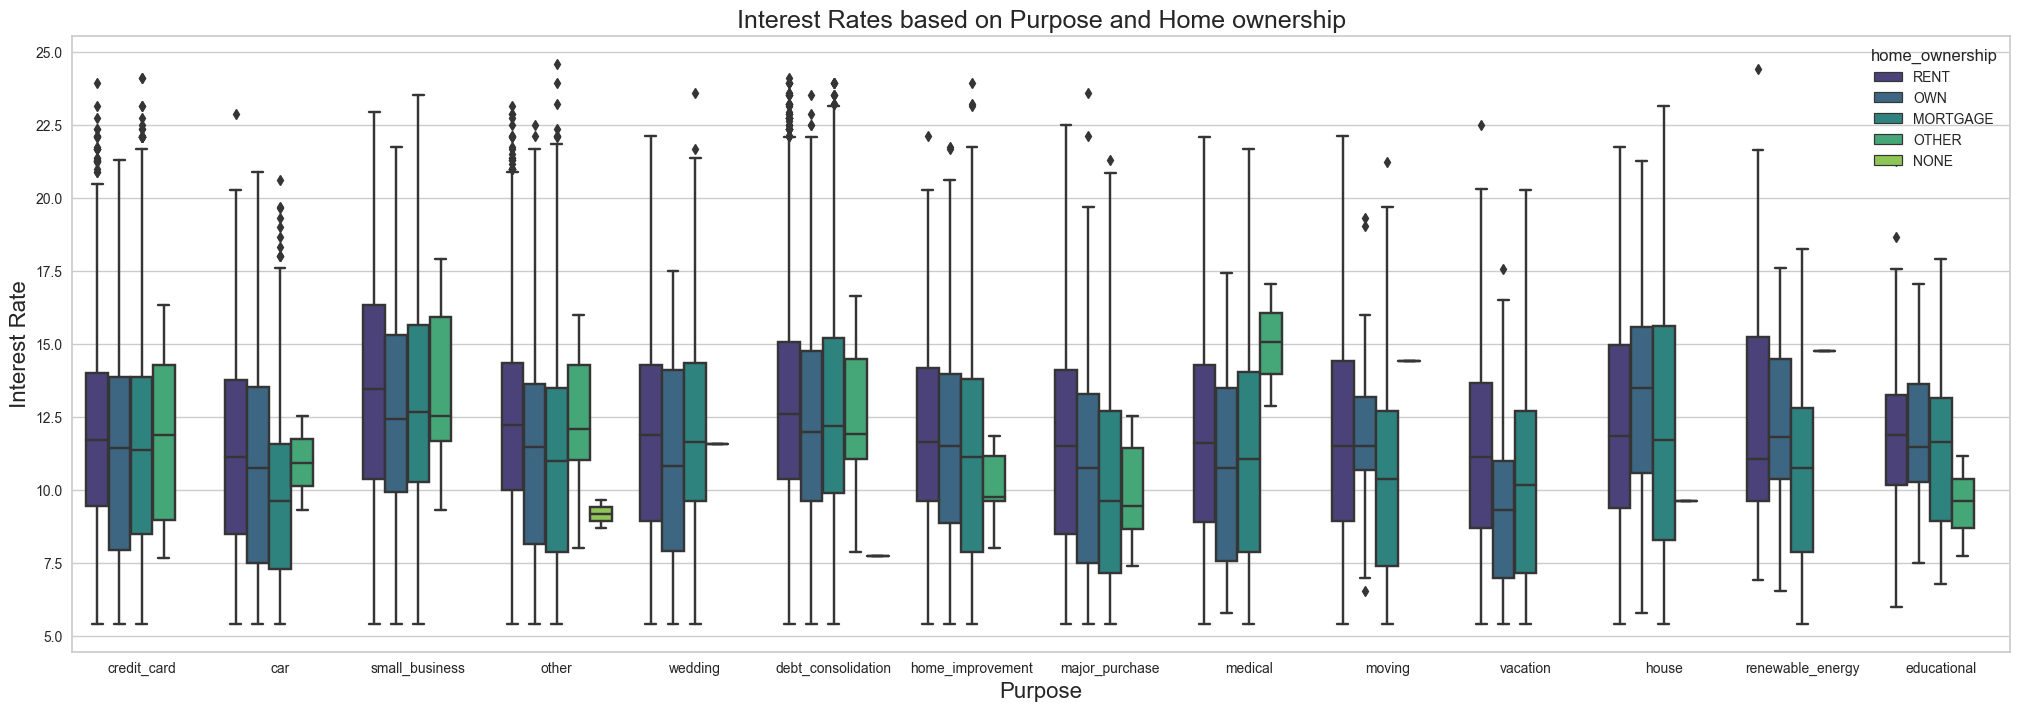

In [228]:
plt.figure(figsize=(25,8))
ax=sns.boxplot(data=df, x="purpose", y="int_rate", hue= "home_ownership", palette= "viridis")
ax.set_title('Interest Rates based on Purpose and Home ownership',fontsize=18)
ax.set_ylabel('Interest Rate',fontsize=16)
ax.set_xlabel('Purpose',fontsize=16)

## Data Preparation

In [230]:
#Checking if there is any missing value in the data/ no missing value
df.isna().any().any()

False

In [231]:
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [232]:
# checking the type of the columns to know categorical values that we have to transform on the dataset
print(df.dtypes)
# Linear models only accept numerical values, so I need to encode categorical variables.

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object


In [233]:
#Changing grade column as categorical value (grade is ordinal) helps to convert each of them into respective numeric value. There are 3 steps to do that.
# 1.Changing the type of "garde" column to categorical
df["grade"] = df["grade"].astype("category")
print(df.dtypes)

int_rate           float64
loan_amnt            int64
term                 int64
grade             category
home_ownership      object
annual_inc         float64
purpose             object
dtype: object


In [234]:
# 2.Providing the correct order of categories 
df.grade =df.grade.cat.reorder_categories(["A","B","C","D","E","F","G"])

In [235]:
# 3.Encoding categories with integer values 
df.grade= df.grade.cat.codes

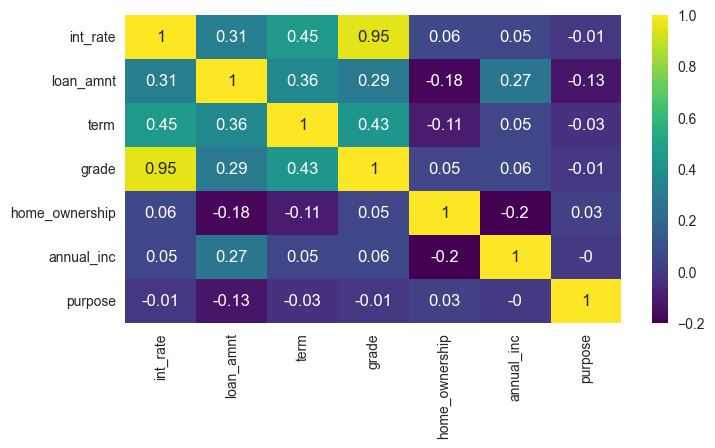

In [324]:
#check correltion matrix - to check the strength of variation bwtween two variables.
#Checking whether 1 or 2 predictors correlate strongly ecah other. When there is multicollinearity, regression equation becomes unstable so we have to remove one of the correlated variables if there is any.
#there is no strong correlation between independent variables. No need to remove any variables. 
correlation_matrix= df.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True, cmap= "viridis")
fgr.savefig("myimage.png")

In [332]:
from matplotlib import pyplot

In [237]:
# for the nominal variables 8"homeownership" or "purpose" columns), there is no order of rank. The previous approach is not useful anymore. So the transformation applied by using one hot encoding approach.
# Identification of the columns that will change as onehot ("home_ownership" and "purpose" columns)
cols = ['home_ownership', 'purpose']

In [238]:
#creating a loop to transform 2 columns that is mentioned above.
for i in cols:
    le = LabelEncoder()
    le.fit(list(df[i].values))
    df[i]= le.transform(list(df[i].values))

In [239]:
#final dataset
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,1,4,24000.0,1
1,15.27,2500,60,2,4,30000.0,0
2,15.96,2400,36,2,4,12252.0,11
3,13.49,10000,36,2,4,49200.0,9
4,12.69,3000,60,1,4,80000.0,9


In [240]:
# tried to scale data before splitting(linear odels can be affected by differnt units-distance based algoritms) but the results of models was tha same with the ones without scaling so I skipped Min Max scaling.

In [241]:
#droping dependent value from dataset before splitting
x= df.drop(["int_rate"], axis="columns")
x

,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,5000,36,1,4,24000.0,1
1,2500,60,2,4,30000.0,0
2,2400,36,2,4,12252.0,11
3,10000,36,2,4,49200.0,9
4,3000,60,1,4,80000.0,9
...,...,...,...,...,...,...
39781,2500,36,0,0,110000.0,4
39782,8500,36,2,4,18000.0,1
39783,5000,36,0,0,100000.0,2
39784,5000,36,0,0,200000.0,9


In [ ]:
#check correltion matrix - to check the strength of variation bwtween two variables.
#Checking whether 1 or 2 predictors correlate strongly ecah other. When there is multicollinearity, regression equation becomes unstable so we have to remove one of the correlated variables if there is any.
#there is no strong correlation between independent variables. No need to remove any variables. 
correlation_matrix= df.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True, cmap= "viridis")
fgr.savefig("myimage.png")

In [242]:
#keeping dependent value in the dataset before splitting
y=df["int_rate"]
y

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39781     8.07
39782    10.28
39783     8.07
39784     7.43
39785    13.75
Name: int_rate, Length: 39786, dtype: float64

In [243]:
#Splitting the dataset by applying random_state to use the same split of data.
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.2, random_state=42)

## Modeling

### Model 1: Multiple Linear Regresion

In [244]:
# linear regresion model fitting to x_train and y_train
model1 = LinearRegression().fit(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



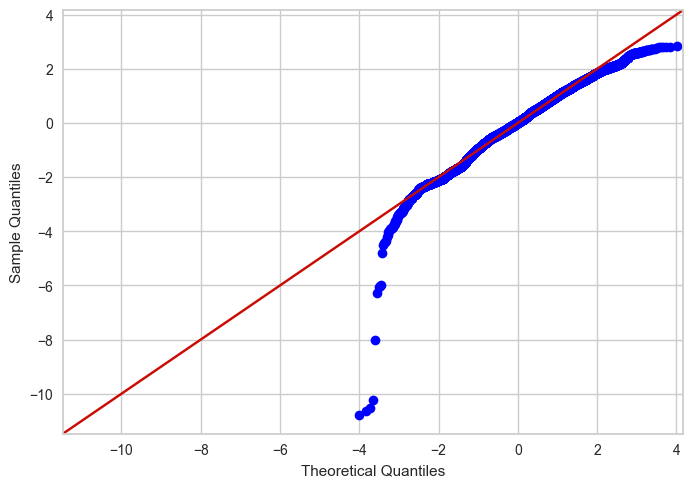

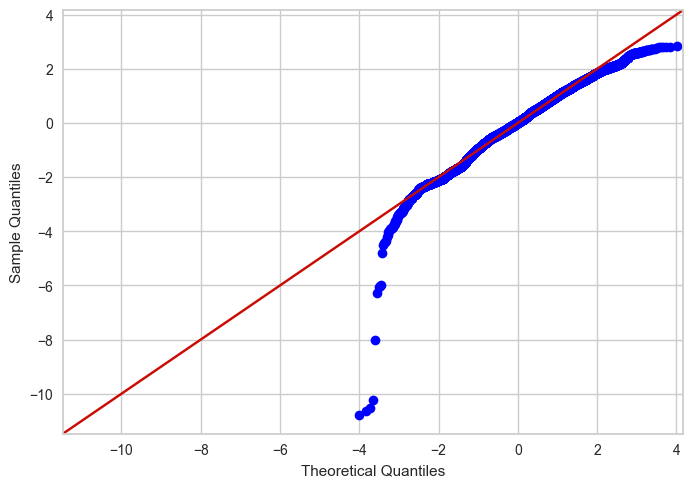

In [320]:
#checking whether resisuals are normally distributed /linear regression assumption 
y_pred=model1.predict(x_train)
residuals=y_train.values-y_pred
sm.qqplot(residuals,line="45",fit=True, dist=stats.norm)

#### Evaluation of Linear Regression Model

Predicted labels:  [ 8. 18. 18. 11. 16.  8.  8. 18. 11.  8.]
Actual labels   :  22900     5.79
27960    17.93
32773    16.45
16463    10.74
22822    14.46
12833     5.42
17036     7.66
29184    16.82
30104    10.99
26804     7.14
Name: int_rate, dtype: float64
MSE: 1.3481702678181415
RMSE: 1.1611073455189842
R2: 0.9016761530927369


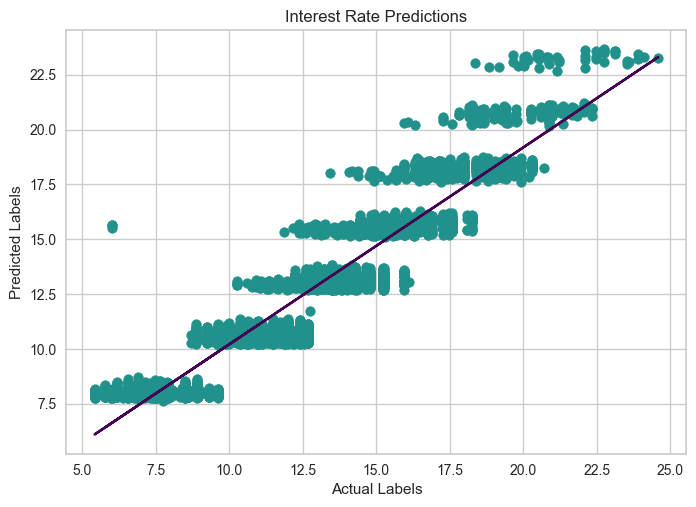

In [315]:
predictions = model1.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

# Evaluate the model using the test data
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions,color="#21918c")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='#440154')
plt.show()

##### Equation of linear regression model

In [247]:
model1.coef_

array([ 0.00001501,  0.01713998,  2.46158496,  0.04788731, -0.00000017,
       -0.00382368])

In [248]:
model1.intercept_

7.169000139318234

##### Based on the result of the fit, we obtain the following linear regression model:                           int_rate =0.00001501.loan_amnt + 0.017.term + 2.46.grade + 0.048.home_ownership - 0.00000017.annual_inc - 0.004.purpose

### Model 2: Gradient Boosting and Evaluation

GradientBoostingRegressor() 

MSE: 1.00838972635082
RMSE: 1.0041861014527238
R2: 0.9264567989345768


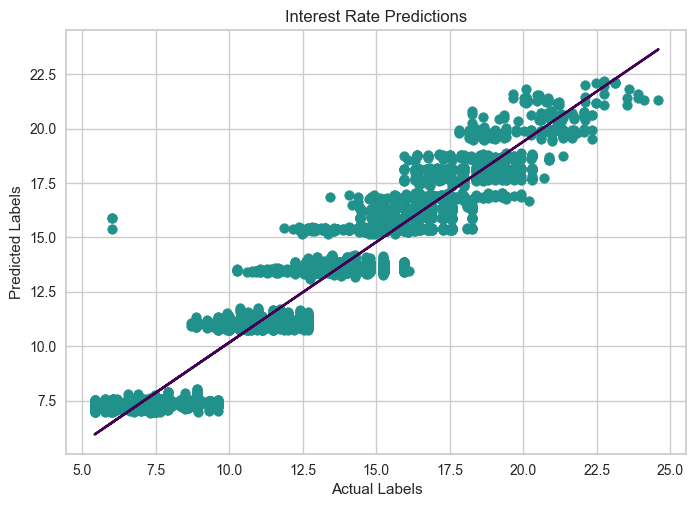

In [311]:
# First, tried Random Forest but Gradient Bossting evaluation results are better than Random Forest. The main differences between them,  Random Forest created trees in parallel while Grandient Boosting creates them sequentially with each tree learning and improving on the previous one. This gives Gradient Boosting an ability to learn from weak learners. 
# Base line model / Fiting Gradient Boosting model on the training set
model2 = GradientBoostingRegressor().fit(x_train, y_train)
print (model2, "\n")

# Evaluate the model using the test data
predictions = model2.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions,color="#21918c")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='#440154')
plt.show()

### Model 3: Best Model / Hyperparameter tunning of Gradient Boosting 

In [325]:
#Hyperparameter tunning with Gradient Boosting to find the best hyperparameters to optimize the r2_score
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1,0.2,0.4,0.5],
 'n_estimators' : [30, 60, 80, 100, 150, 200, 250],
 "max_depth":[3,5,7,8]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch3 = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch3.fit(x_train, y_train)
print("Best parameter combination:", gridsearch3.best_params_, "\n")

# Get the best model
model3=gridsearch3.best_estimator_
print(model3, "\n")

# Evaluate the model using the test data
predictions3 = model3.predict(x_test)
mse = mean_squared_error(y_test, predictions3)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions3)
print("R2:", r2)



Best parameter combination: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 30} 

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=30) 

MSE: 1.0016780750148462
RMSE: 1.0008386858104787
R2: 0.926946288574132


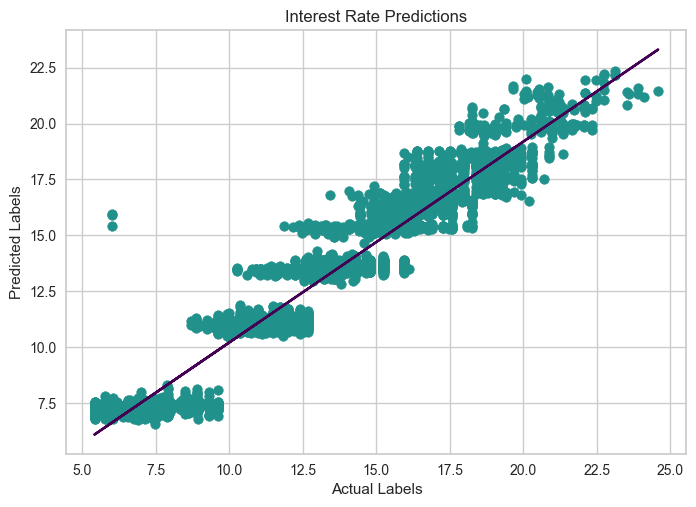

In [326]:
#Prediction are very close to linear line which is the best model with best r^2. Mean square error is very low.
# Plot predicted vs actual
plt.scatter(y_test, predictions3, color="#21918c")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Interest Rate Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='#440154')
plt.show()

[0.00349372 0.00469624 0.98968679 0.00034004 0.00092001 0.00086321]


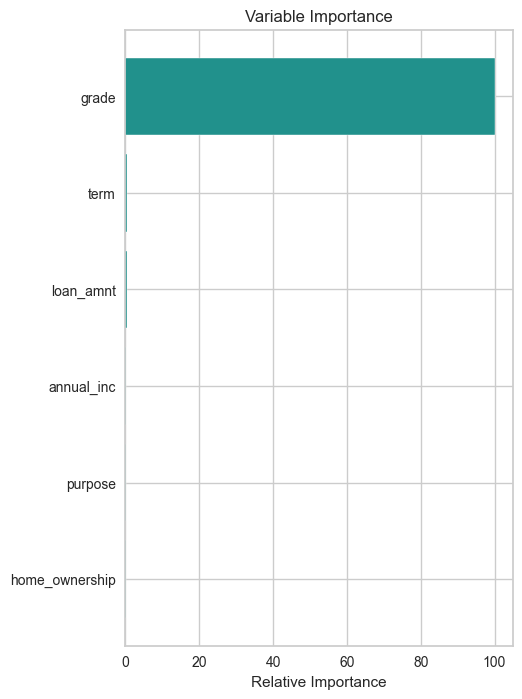

In [327]:
#feature importance for Gradient Bootsing model. 
# how important these variables while determining interest rate
feature_importance = model3.feature_importances_
print(feature_importance)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(5, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center',color="#21918c")
plt.yticks(pos,x_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


##### 10 best models with Gradient Boosting

In [329]:
results = pd.DataFrame(gridsearch3.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)

In [330]:
#There is no overfitting since mean_train score=0.932 and mean_test score=0.928.
results[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
35,0.393721,0.004378,0.008944,0.000788,0.2,5,30,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.928679,0.929100,0.927066,0.928281,0.000877,1,0.931875,0.931917,0.932557,0.932116,0.000312
8,0.751519,0.003807,0.016052,0.000815,0.1,5,60,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.928457,0.929176,0.927031,0.928221,0.000892,2,0.931948,0.931615,0.932419,0.931994,0.000330
9,1.003845,0.004752,0.018085,0.000830,0.1,5,80,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.928420,0.929157,0.926923,0.928167,0.000929,3,0.932987,0.932391,0.933378,0.932919,0.000406
10,1.258011,0.016744,0.020380,0.000981,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.928316,0.929160,0.926866,0.928114,0.000948,4,0.933821,0.933186,0.934288,0.933765,0.000452
4,1.193740,0.003000,0.017362,0.000451,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.928358,0.928762,0.926984,0.928035,0.000761,5,0.929839,0.929568,0.930476,0.929961,0.000381
3,0.808590,0.012505,0.013683,0.000454,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.928413,0.928754,0.926875,0.928014,0.000817,6,0.929189,0.928917,0.929829,0.929312,0.000382
29,0.498868,0.016979,0.007979,0.000039,0.2,3,60,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.928159,0.928820,0.927016,0.927999,0.000745,7,0.929535,0.929266,0.930207,0.929669,0.000396
2,0.660548,0.008269,0.012102,0.000890,0.1,3,80,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.928419,0.928752,0.926775,0.927982,0.000864,8,0.928817,0.928602,0.929482,0.928967,0.000375
30,0.648840,0.002531,0.010464,0.000737,0.2,3,80,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.928111,0.928802,0.926979,0.927964,0.000751,9,0.929997,0.929785,0.930782,0.930188,0.000429
5,1.615457,0.024688,0.024333,0.001700,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.928199,0.928762,0.926909,0.927957,0.000775,10,0.930376,0.930140,0.931007,0.930508,0.000366


In [340]:
ypredict=model3.predict(np.array([[5000,36,1,4,24000,1]]))
ypredict

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([11.02214267])

In [344]:
ypredict=model3.predict(np.array([[2500,60,2,4,30000,0]]))
ypredict

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([13.62449611])

In [346]:
ypredict=model3.predict(np.array([[10000,36,2,4,49200,9]]))
ypredict

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([13.45109631])